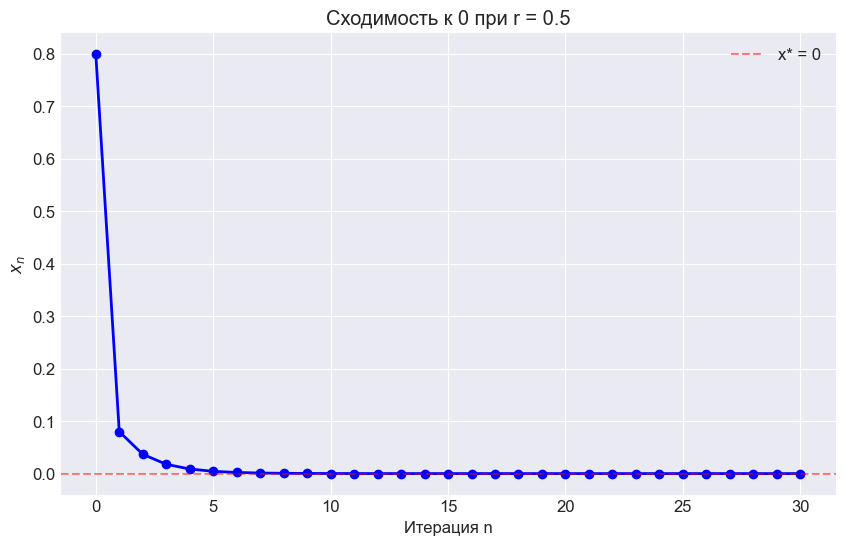

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

def plot_stability_r_small():
    r = 0.5
    x0 = 0.8
    iterations = 30
    
    x = x0
    trajectory = [x]
    
    for _ in range(iterations):
        x = r * x * (1 - x)
        trajectory.append(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(trajectory, 'bo-', linewidth=2, markersize=6)
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='x* = 0')
    plt.xlabel('Итерация n')
    plt.ylabel('$x_n$')
    plt.title(f'Сходимость к 0 при r = {r}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_stability_r_small()

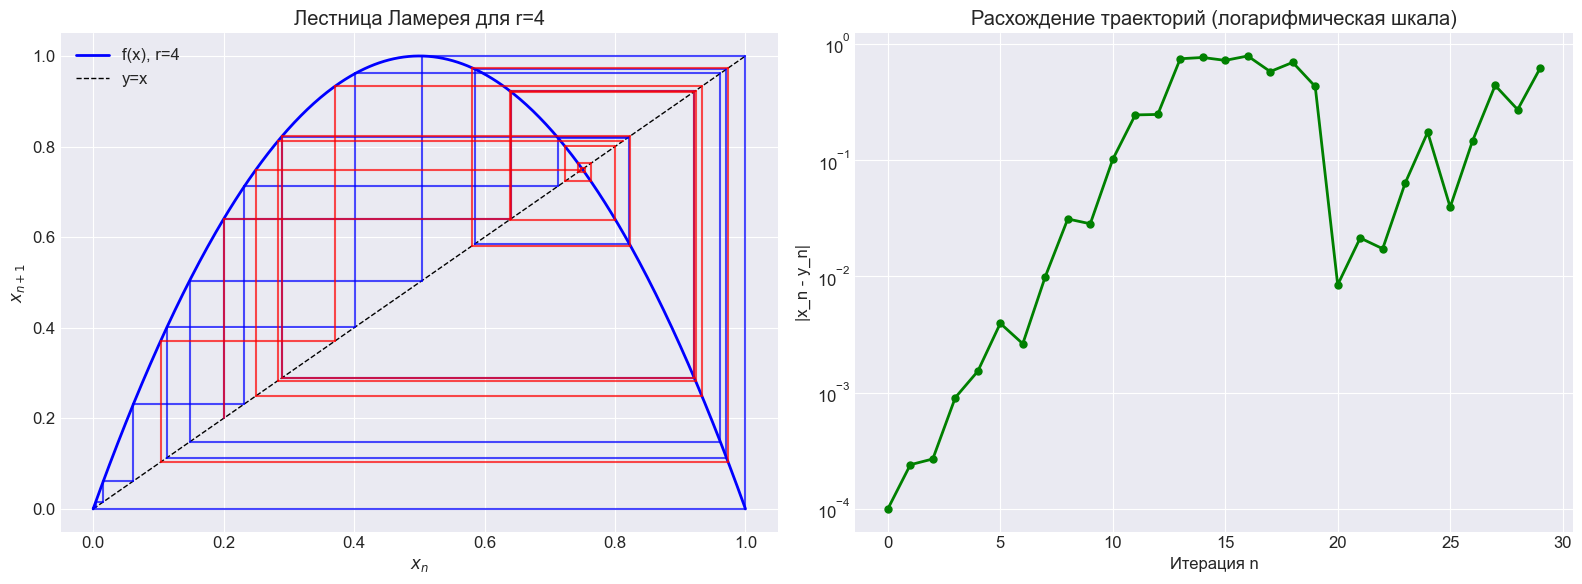

In [3]:
def plot_two_lamerey(r=4, x0=0.2, eps=0.0001, n_iter=30):
    """Построение двух траекторий лестницы Ламерея"""
    f = lambda x: r * x * (1 - x)

    x_traj = [x0]
    y_traj = [x0 + eps]
    
    for _ in range(n_iter):
        x_traj.append(f(x_traj[-1]))
        y_traj.append(f(y_traj[-1]))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    x_range = np.linspace(0, 1, 400)
    ax1.plot(x_range, f(x_range), 'b-', linewidth=2, label=f'f(x), r={r}')
    ax1.plot(x_range, x_range, 'k--', linewidth=1, label='y=x')

    for i in range(min(20, n_iter)):
        ax1.plot([x_traj[i], x_traj[i]], [x_traj[i], x_traj[i+1]], 'b-', alpha=0.7)
        ax1.plot([x_traj[i], x_traj[i+1]], [x_traj[i+1], x_traj[i+1]], 'b-', alpha=0.7)

    for i in range(min(20, n_iter)):
        ax1.plot([y_traj[i], y_traj[i]], [y_traj[i], y_traj[i+1]], 'r-', alpha=0.7)
        ax1.plot([y_traj[i], y_traj[i+1]], [y_traj[i+1], y_traj[i+1]], 'r-', alpha=0.7)
    
    ax1.set_xlabel('$x_n$')
    ax1.set_ylabel('$x_{n+1}$')
    ax1.set_title(f'Лестница Ламерея для r={r}')
    ax1.legend()
    ax1.grid(True)

    ax2.semilogy(range(min(30, len(x_traj))), 
                np.abs(np.array(x_traj[:30]) - np.array(y_traj[:30])), 
                'go-', linewidth=2, markersize=5)
    ax2.set_xlabel('Итерация n')
    ax2.set_ylabel('|x_n - y_n|')
    ax2.set_title('Расхождение траекторий (логарифмическая шкала)')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_two_lamerey()

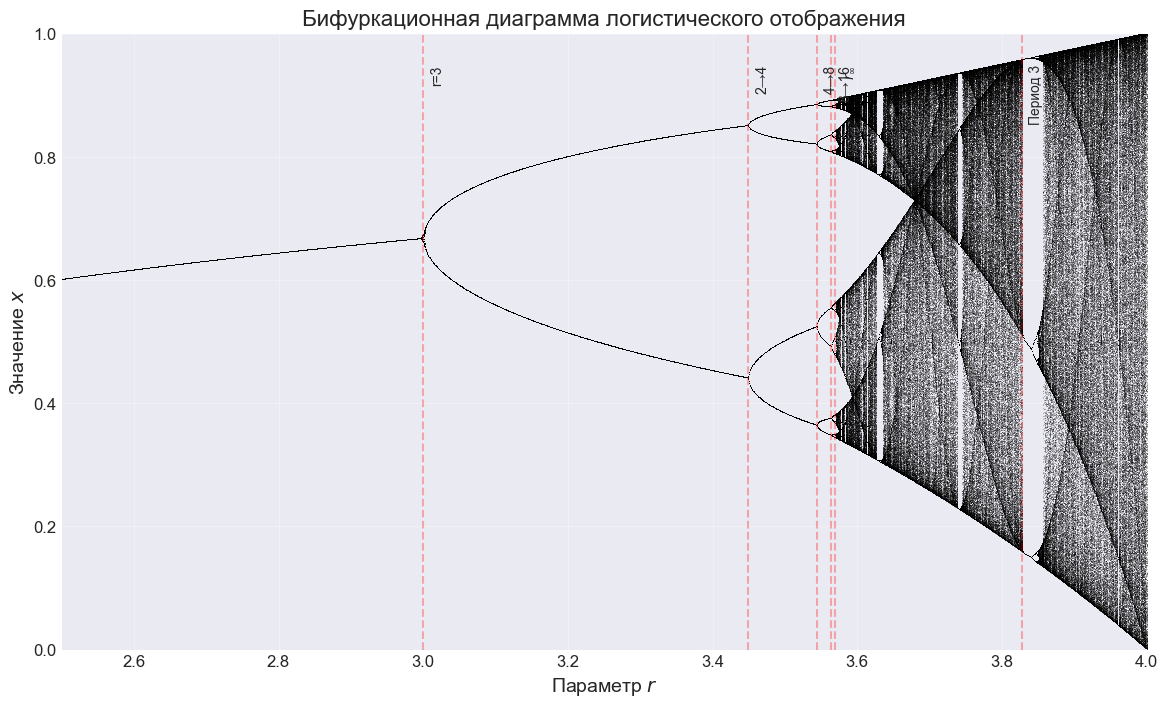

In [4]:
def logistic_bifurcation_diagram(r_min=2.5, r_max=4.0, n_r=2000, 
                                 n_iter=1000, n_last=200, figsize=(14, 8)):
    """Построение бифуркационной диаграммы логистического отображения"""
    
    r_vals = np.linspace(r_min, r_max, n_r)
    x_vals = []
    r_plot = []

    x0_vals = np.random.uniform(0.1, 0.9, 5)
    
    for r in r_vals:
        for x0 in x0_vals:
            x = x0
            for _ in range(n_iter):
                x = r * x * (1 - x)
            for _ in range(n_last):
                x = r * x * (1 - x)
                x_vals.append(x)
                r_plot.append(r)
    
    plt.figure(figsize=figsize)
    plt.plot(r_plot, x_vals, ',k', alpha=0.25, markersize=0.1)
    plt.xlabel('Параметр $r$', fontsize=14)
    plt.ylabel('Значение $x$', fontsize=14)
    plt.title('Бифуркационная диаграмма логистического отображения', fontsize=16)

    important_r = [1, 3, 3.44949, 3.54409, 3.56441, 3.5699456, 3.828]
    labels = ['r=1', 'r=3', '2→4', '4→8', '8→16', r'$r_\infty$', 'Период 3']
    
    for i, r_val in enumerate(important_r):
        if r_min <= r_val <= r_max:
            plt.axvline(x=r_val, color='red', alpha=0.3, linestyle='--')
            plt.text(r_val + 0.01, 0.95, labels[i], rotation=90, 
                    verticalalignment='top', fontsize=10)
    
    plt.grid(True, alpha=0.3)
    plt.xlim(r_min, r_max)
    plt.ylim(0, 1)
    plt.show()

logistic_bifurcation_diagram()

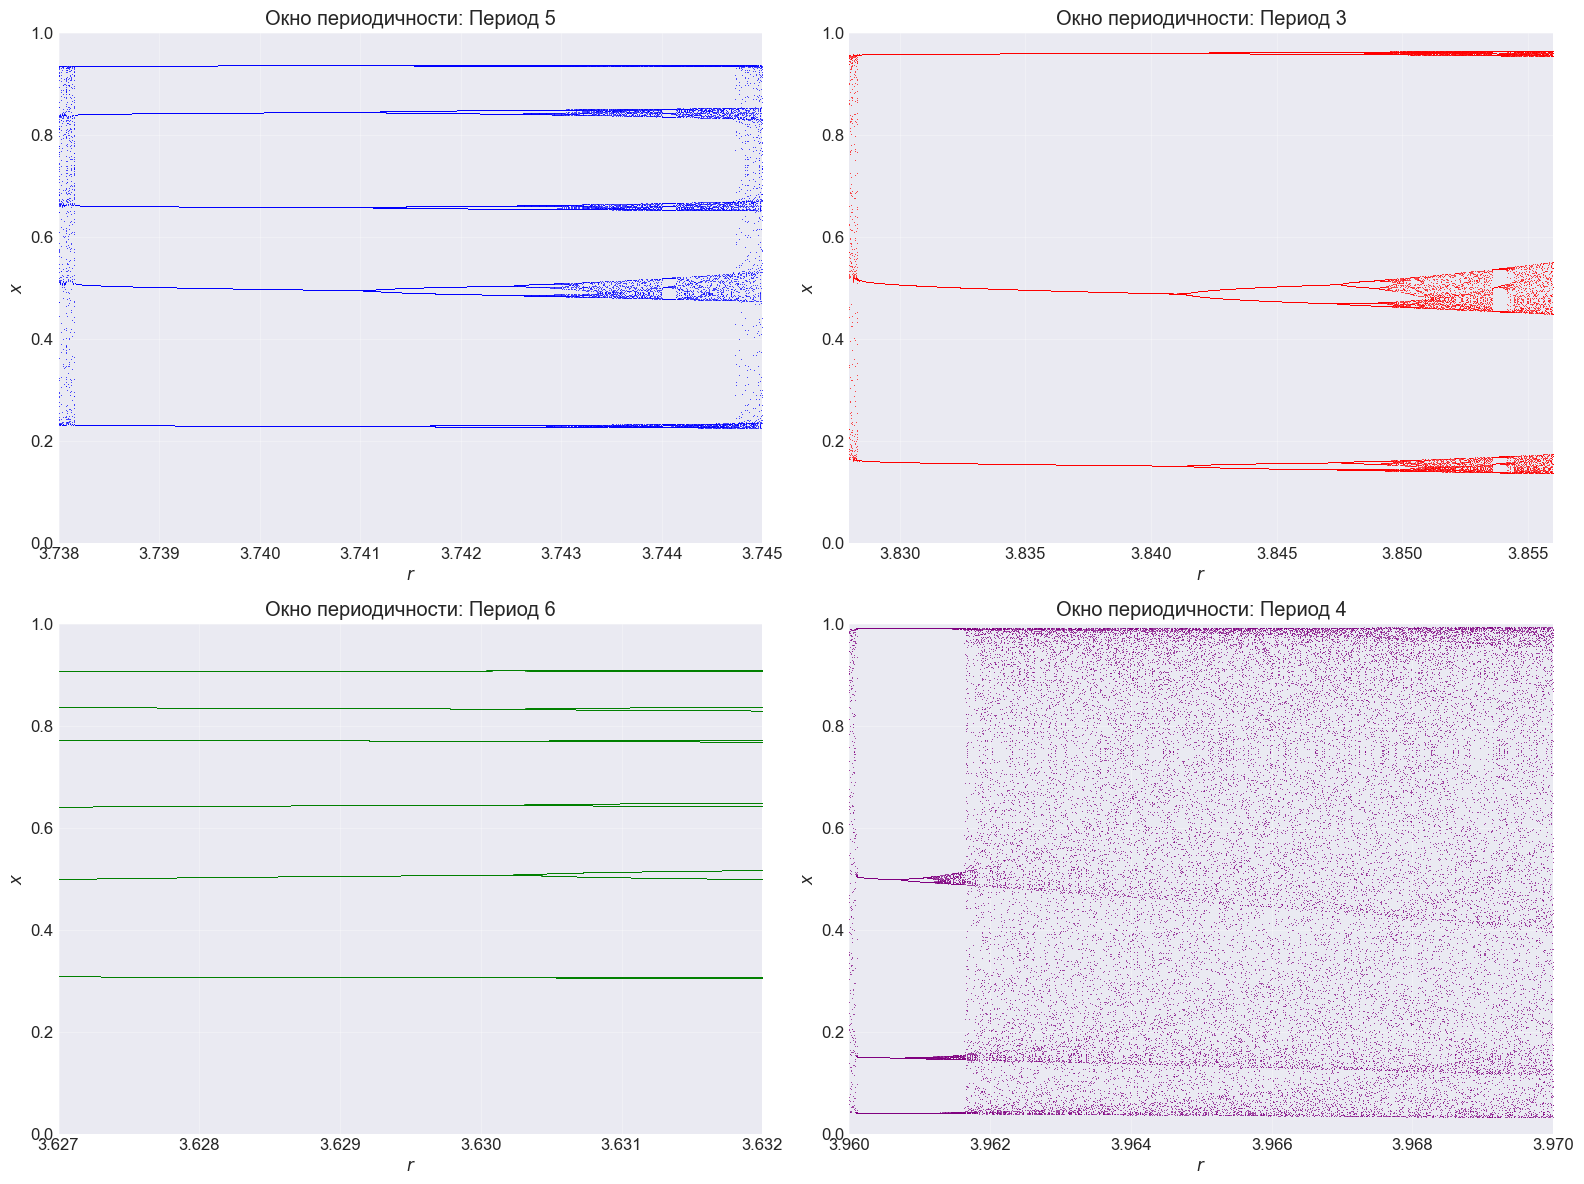

In [6]:
def plot_period_windows():
    """Визуализация окон периодичности"""
    
    windows = [
        (3.738, 3.745, 'Период 5', 'blue'),
        (3.828, 3.856, 'Период 3', 'red'),
        (3.627, 3.632, 'Период 6', 'green'),
        (3.96, 3.97, 'Период 4', 'purple')
    ]
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for idx, (r_min, r_max, label, color) in enumerate(windows):
        if idx < 4:
            ax = axes[idx]
            r_vals = np.linspace(r_min, r_max, 800)
            x_vals = []
            r_plot = []
            
            for r in r_vals:
                x = 0.5
                for _ in range(200):
                    x = r * x * (1 - x)
                for _ in range(50):
                    x = r * x * (1 - x)
                    x_vals.append(x)
                    r_plot.append(r)
            
            ax.plot(r_plot, x_vals, ',', color=color, alpha=0.7, markersize=0.5)
            ax.set_xlabel('$r$')
            ax.set_ylabel('$x$')
            ax.set_title(f'Окно периодичности: {label}')
            ax.grid(True, alpha=0.3)
            ax.set_xlim(r_min, r_max)
            ax.set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

plot_period_windows()

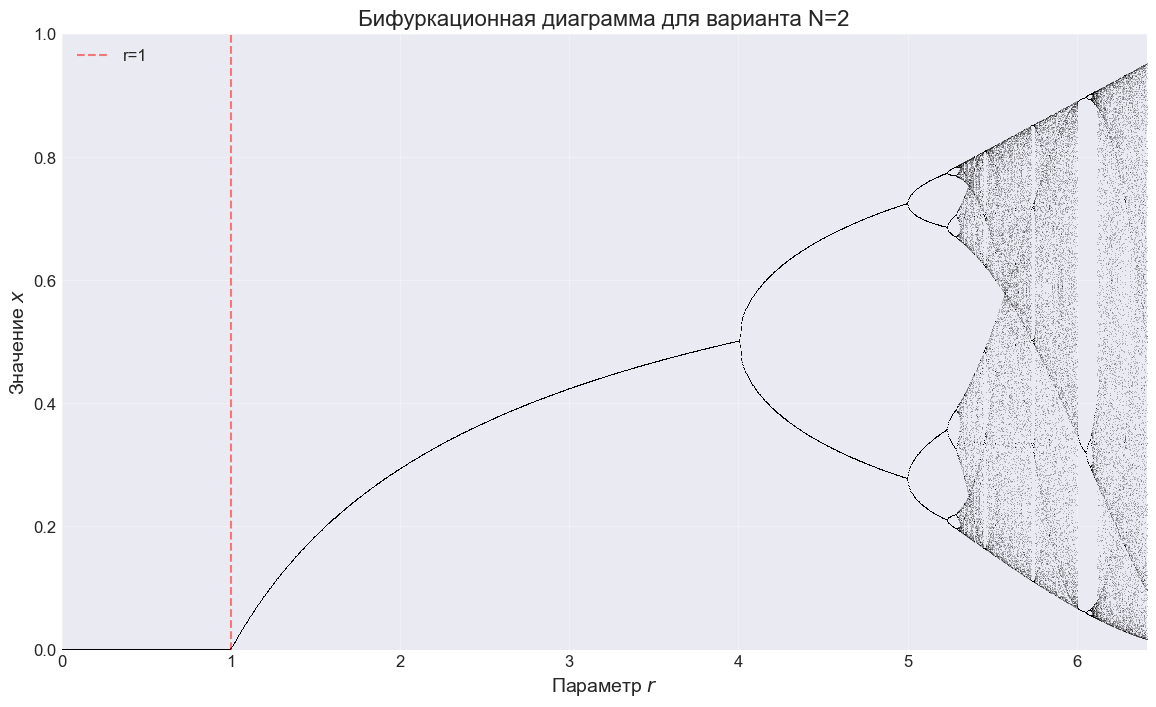

In [8]:
def variant_mapping(N=2):
    """Бифуркационная диаграмма для вариантного отображения"""

    if N == 0:
        def g(x, r): return r * x * (1 - x) * (2 + x)
        r_max = 27/(2*(7*np.sqrt(7)-10))
    elif N == 1:
        def g(x, r): return r * x * (1 - x**2)
        r_max = 3*np.sqrt(3)/2
    elif N == 2:
        def g(x, r): return r * x * (1 - x)**2
        r_max = 27/4
    elif N == 3:
        def g(x, r): return r * x * (1 - x) * (3 - x)
        r_max = 27/(2*(7*np.sqrt(7)-10))
    elif N == 4:
        def g(x, r): return r * x * (1 - x) * (2 - x)
        r_max = 3*np.sqrt(3)/2

    r_vals = np.linspace(0, r_max * 0.95, 2000)
    x_vals = []
    r_plot = []
    
    for r in r_vals:
        x = 0.5
        for _ in range(500):
            x = g(x, r)
        for _ in range(100):
            x = g(x, r)
            x_vals.append(x)
            r_plot.append(r)
    
    plt.figure(figsize=(14, 8))
    plt.plot(r_plot, x_vals, ',k', alpha=0.25, markersize=0.1)
    plt.xlabel('Параметр $r$', fontsize=14)
    plt.ylabel('Значение $x$', fontsize=14)
    plt.title(f'Бифуркационная диаграмма для варианта N={N}', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.xlim(0, r_max * 0.95)
    plt.ylim(0, 1)
    plt.axvline(x=1, color='red', alpha=0.5, linestyle='--', label='r=1')
    plt.legend()
    plt.show()
    
    return r_max

r_max_variant = variant_mapping(N=2)

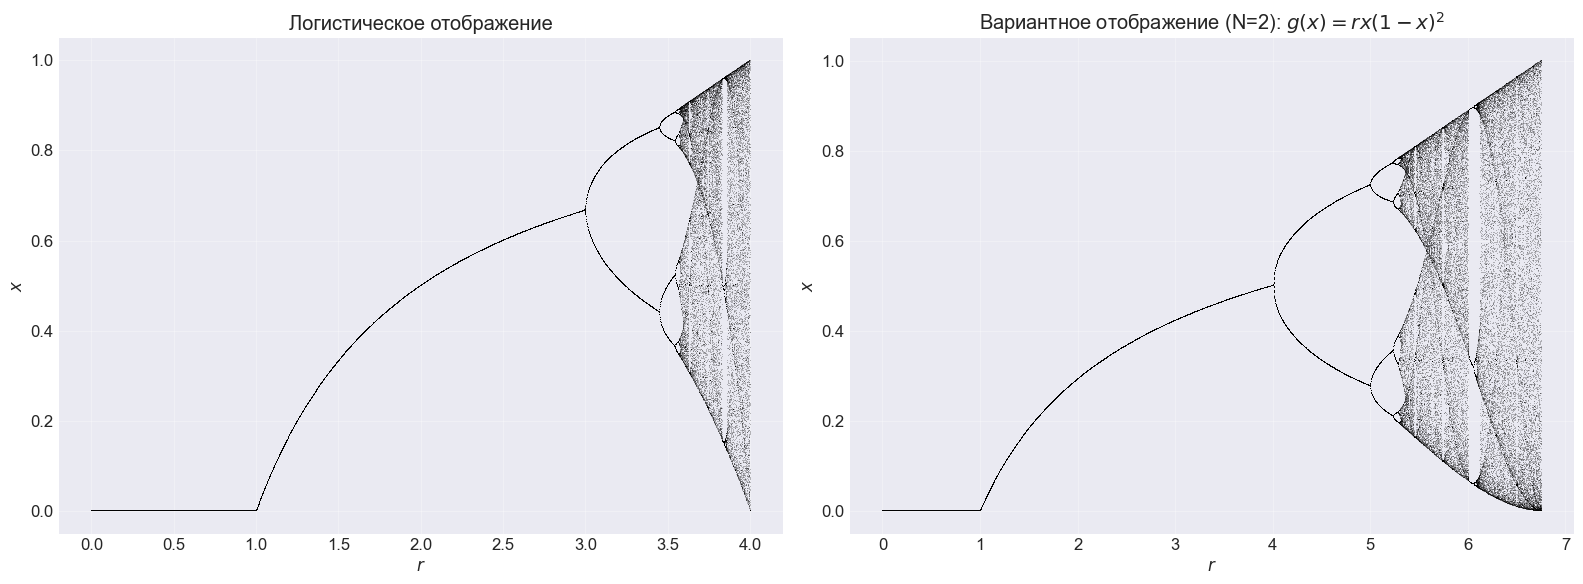

In [9]:
def compare_mappings():
    """Сравнение логистического и вариантного отображений"""
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Логистическое отображение
    r_vals = np.linspace(0, 4, 2000)
    x_vals_log = []
    r_plot_log = []
    
    for r in r_vals:
        x = 0.5
        for _ in range(500):
            x = r * x * (1 - x)
        for _ in range(100):
            x = r * x * (1 - x)
            x_vals_log.append(x)
            r_plot_log.append(r)
    
    axes[0].plot(r_plot_log, x_vals_log, ',k', alpha=0.25, markersize=0.1)
    axes[0].set_xlabel('$r$')
    axes[0].set_ylabel('$x$')
    axes[0].set_title('Логистическое отображение')
    axes[0].grid(True, alpha=0.3)
    
    # Вариантное отображение (N=2)
    def g(x, r): return r * x * (1 - x)**2
    r_max = 27/4
    r_vals_var = np.linspace(0, r_max, 2000)
    x_vals_var = []
    r_plot_var = []
    
    for r in r_vals_var:
        x = 0.5
        for _ in range(500):
            x = g(x, r)
        for _ in range(100):
            x = g(x, r)
            x_vals_var.append(x)
            r_plot_var.append(r)
    
    axes[1].plot(r_plot_var, x_vals_var, ',k', alpha=0.25, markersize=0.1)
    axes[1].set_xlabel('$r$')
    axes[1].set_ylabel('$x$')
    axes[1].set_title('Вариантное отображение (N=2): $g(x)=rx(1-x)^2$')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

compare_mappings()